In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_path = '/content/drive/MyDrive/5th semester /OOP/M2_Group_7 Team Nexus : Fake URL Detection/Dataset /0. phishing_site_urls(550k_Data).xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (549346, 2)

First 5 rows:
                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


In [ ]:
# Check label distribution
print("\nLabel distribution:")
print(df['Label'].value_counts())



Label distribution:
Label
good    392924
bad     156422
Name: count, dtype: int64


In [ ]:
# Sample 5k good and 5k bad URLs
good_urls = df[df['Label'] == 'good'].sample(5000, random_state=42)
bad_urls = df[df['Label'] == 'bad'].sample(5000, random_state=42)

In [ ]:
# Combine the samples
balanced_df = pd.concat([good_urls, bad_urls])

In [ ]:
# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Preprocessing: Convert labels to binary (0 for good, 1 for bad)
balanced_df['Label'] = balanced_df['Label'].map({'good': 0, 'bad': 1})

In [ ]:
# Split into features and target
X = balanced_df['URL']
y = balanced_df['Label']

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Dictionary to store model performance
results = {}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # Added XGBoost
}


Training Logistic Regression...
Logistic Regression Accuracy: 0.8775
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1013
           1       0.91      0.84      0.87       987

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



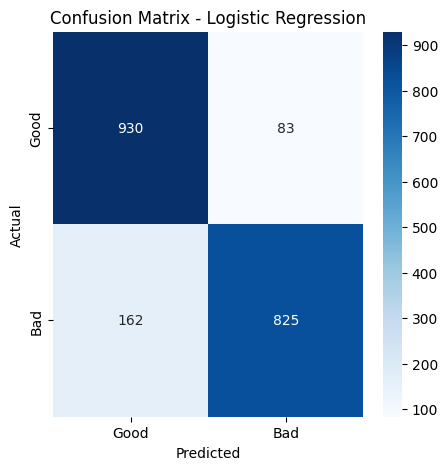


Training Decision Tree...
Decision Tree Accuracy: 0.8170
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1013
           1       0.86      0.75      0.80       987

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



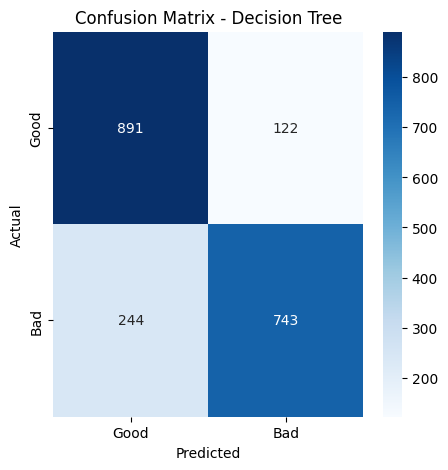


Training Random Forest...
Random Forest Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1013
           1       0.90      0.82      0.86       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



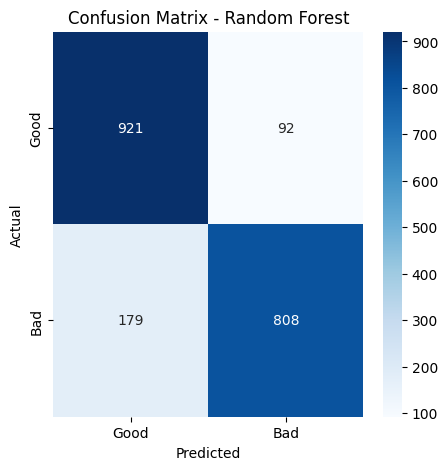


Training SVM...
SVM Accuracy: 0.8870
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1013
           1       0.92      0.85      0.88       987

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



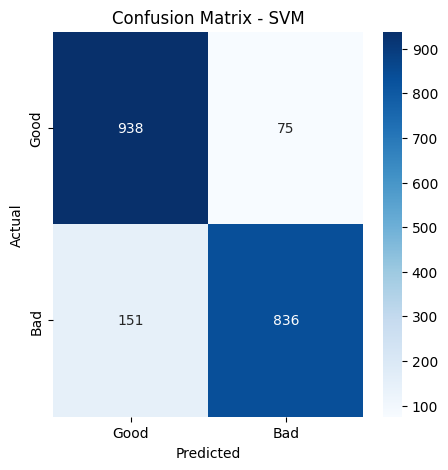


Training Naive Bayes...
Naive Bayes Accuracy: 0.8830
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1013
           1       0.89      0.87      0.88       987

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



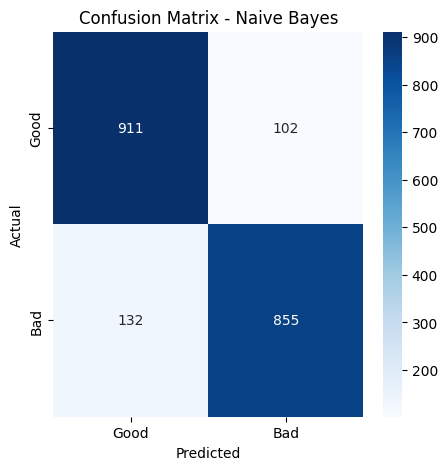


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1013
           1       0.88      0.72      0.79       987

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



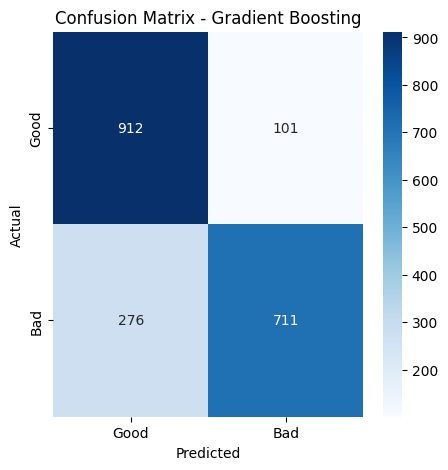


Training AdaBoost...
AdaBoost Accuracy: 0.7605
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      1013
           1       0.82      0.65      0.73       987

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



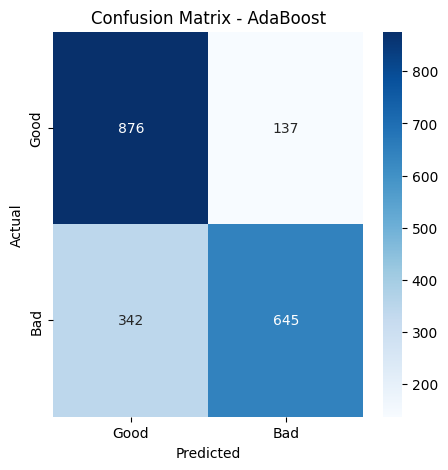


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:59:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8550
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1013
           1       0.91      0.78      0.84       987

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



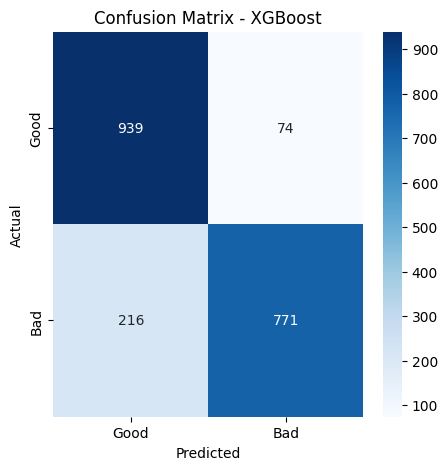

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy  # Store results in results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good', 'Bad'],
                yticklabels=['Good', 'Bad'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Compare model performance
print("\nModel Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Model Comparison:
Logistic Regression: 0.8775
Decision Tree: 0.8170
Random Forest: 0.8645
SVM: 0.8870
Naive Bayes: 0.8830
Gradient Boosting: 0.8115
AdaBoost: 0.7605
XGBoost: 0.8550


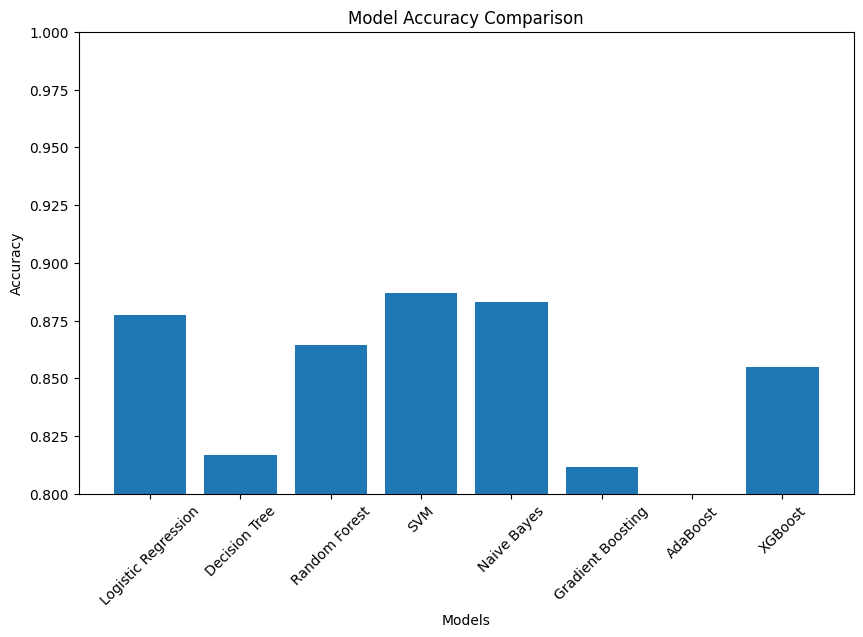

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

# Task
Explain the error in the selected code and provide suggestions on how to increase the accuracy of the model.

## Data exploration and cleaning

### Subtask:
Analyze the dataset for potential issues like missing values or inconsistent formatting in the URLs that might affect model performance.


**Reasoning**:
Check for missing values in the relevant columns of the balanced dataframe.



In [ ]:
print("Missing values in balanced_df:")
print(balanced_df[['URL', 'Label']].isnull().sum())

Missing values in balanced_df:
URL      0
Label    0
dtype: int64


**Reasoning**:
Examine a sample of URLs to identify potential formatting issues.



In [ ]:
print("\nSample of URLs:")
print(balanced_df['URL'].sample(10, random_state=42).tolist())


Sample of URLs:
['eotu.cc/NeT/', 'bjcurio.com/js/index.htm?us.battle.net/login/en/?ref=mubtldrus.battle.net/d3/en/index&app=com-d3', 'en.wikipedia.org/wiki/Brad_Johnson_(television_actor)', 'j.gs/2912956/paypalcomuscgi-binwebscrcmdlogin-s', 'www.gotw.ca/gotw/index.htm', 'christmas-metal-meeting.de/43ftybb8', '65.33.236.173/se77.avi', 'galereslafayette.com/ta/Panel/', 'casaxavier.com.mx/5g4f3', 'dnat400.ru/system/logs/pm.exe']


## Feature engineering

### Subtask:
Explore creating new features from the URLs that might be more informative for the models, such as length of the URL, number of special characters, presence of certain keywords, or domain-specific features.


**Reasoning**:
Calculate the length of each URL, count special characters, and create a binary feature for phishing keywords as instructed.



In [ ]:
# 1. Calculate URL length
balanced_df['url_length'] = balanced_df['URL'].apply(len)

# 2. Count special characters (a common set)
special_chars = '/:.-_?'
balanced_df['special_char_count'] = balanced_df['URL'].apply(lambda x: sum(x.count(c) for c in special_chars))

# 3. Create binary feature for phishing keywords
phishing_keywords = ['login', 'paypal', 'bank', 'account', 'webscr', 'confirm', 'secure']
balanced_df['has_phishing_keywords'] = balanced_df['URL'].apply(lambda x: any(keyword in x.lower() for keyword in phishing_keywords)).astype(int)

# 4. Extract domain length (as a simple domain-specific feature)
# This is a basic approach and can be expanded
from urllib.parse import urlparse
balanced_df['domain_length'] = balanced_df['URL'].apply(lambda x: len(urlparse(x).netloc))

# 5. Display the first few rows with new features
display(balanced_df.head())

,URL,Label,url_length,special_char_count,has_phishing_keywords,domain_length
0,rjblawfirm.com/business/index.php,1,33,4,0,0
1,business.transworld.net/21965/features/executi...,0,74,9,0,0
2,lmunet.edu/,0,11,2,0,0
3,gardening.about.com/od/winerrosecare/tp/Winter...,0,60,9,0,0
4,sfbay.craigslist.org/pen/edu/2702459626.html,0,44,6,0,0


## Advanced feature extraction

### Subtask:
Experiment with more advanced text feature extraction techniques beyond basic TF-IDF, such as using n-grams, or even word embeddings if appropriate for the dataset size and nature.


**Reasoning**:
Initialize a TfidfVectorizer with n-gram range (1, 2) and apply it to the training and test data.



In [ ]:
# Initialize TfidfVectorizer with n-gram range (1, 2)
vectorizer_ngram = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf_ngram = vectorizer_ngram.fit_transform(X_train)

# Transform the test data
X_test_tfidf_ngram = vectorizer_ngram.transform(X_test)

# Print the shapes of the new TF-IDF matrices
print("Shape of X_train_tfidf_ngram:", X_train_tfidf_ngram.shape)
print("Shape of X_test_tfidf_ngram:", X_test_tfidf_ngram.shape)

Shape of X_train_tfidf_ngram: (8000, 5000)
Shape of X_test_tfidf_ngram: (2000, 5000)


**Reasoning**:
Train and evaluate the models using the TF-IDF features with n-grams.




Training Logistic Regression with n-grams...
Logistic Regression Accuracy with n-grams: 0.8805
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1013
           1       0.92      0.83      0.87       987

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



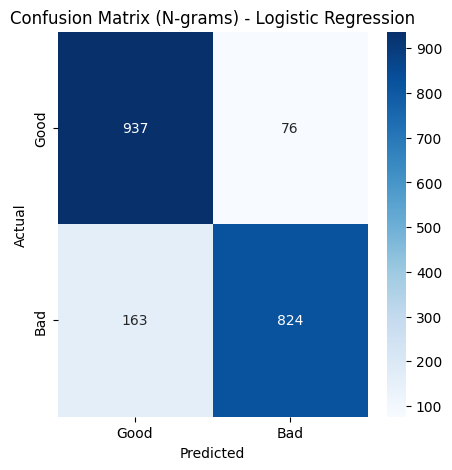


Training Decision Tree with n-grams...
Decision Tree Accuracy with n-grams: 0.8405
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1013
           1       0.87      0.80      0.83       987

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



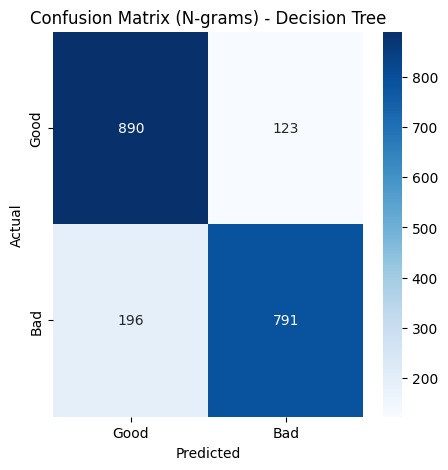


Training Random Forest with n-grams...
Random Forest Accuracy with n-grams: 0.8615
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1013
           1       0.90      0.81      0.85       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



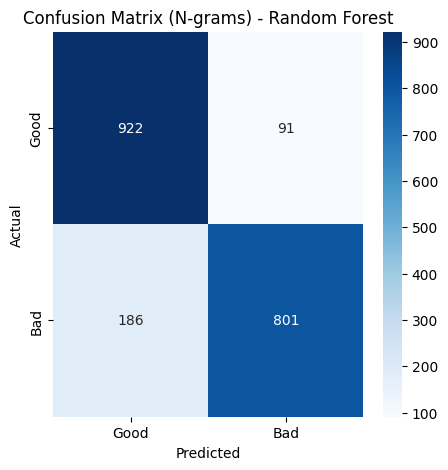


Training SVM with n-grams...
SVM Accuracy with n-grams: 0.8830
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1013
           1       0.92      0.84      0.88       987

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



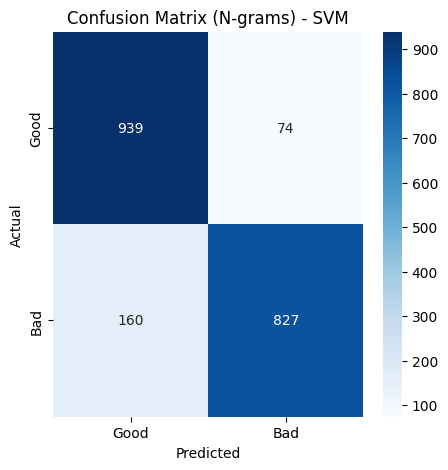


Training Naive Bayes with n-grams...
Naive Bayes Accuracy with n-grams: 0.8790
              precision    recall  f1-score   support

           0       0.86      0.92      0.88      1013
           1       0.91      0.84      0.87       987

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



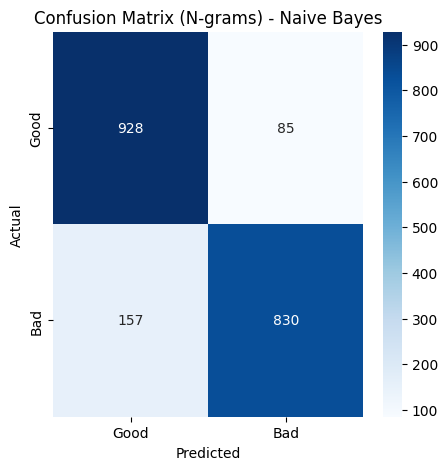


Training Gradient Boosting with n-grams...
Gradient Boosting Accuracy with n-grams: 0.8120
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1013
           1       0.87      0.72      0.79       987

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



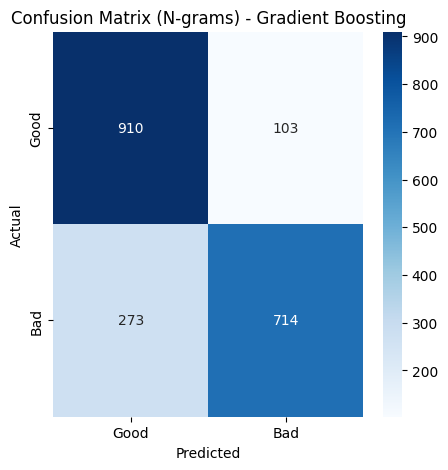


Training AdaBoost with n-grams...
AdaBoost Accuracy with n-grams: 0.7520
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1013
           1       0.81      0.66      0.72       987

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



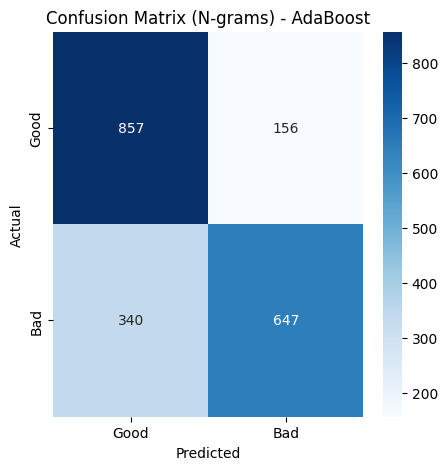


Training XGBoost with n-grams...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:01:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy with n-grams: 0.8590
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1013
           1       0.91      0.79      0.85       987

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



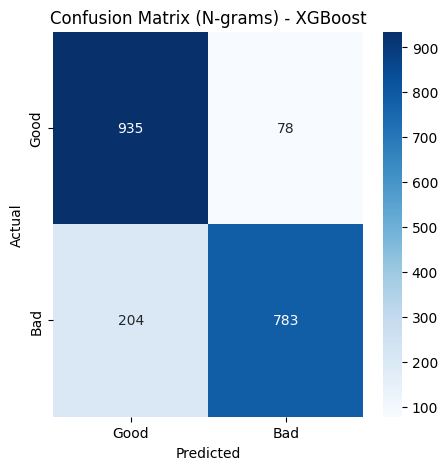

In [ ]:
# Dictionary to store model performance with n-grams
results_ngram = {}

# Train and evaluate models with n-grams
for name, model in models.items():
    print(f"\nTraining {name} with n-grams...")
    model.fit(X_train_tfidf_ngram, y_train)
    y_pred_ngram = model.predict(X_test_tfidf_ngram)
    accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
    results_ngram[name] = accuracy_ngram
    print(f"{name} Accuracy with n-grams: {accuracy_ngram:.4f}")
    print(classification_report(y_test, y_pred_ngram))

    # Plot confusion matrix
    cm_ngram = confusion_matrix(y_test, y_pred_ngram)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_ngram, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good', 'Bad'],
                yticklabels=['Good', 'Bad'])
    plt.title(f'Confusion Matrix (N-grams) - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**Reasoning**:
Compare the model performance with and without n-grams and plot the accuracy comparison.




Model Comparison (N-grams):
Logistic Regression: 0.8805
Decision Tree: 0.8405
Random Forest: 0.8615
SVM: 0.8830
Naive Bayes: 0.8790
Gradient Boosting: 0.8120
AdaBoost: 0.7520
XGBoost: 0.8590


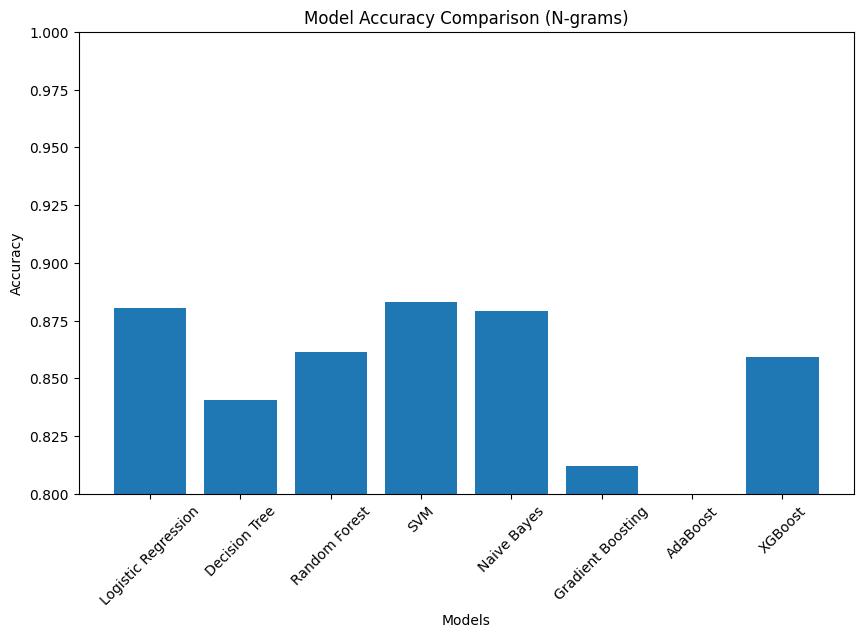

In [ ]:
# Compare model performance with n-grams
print("\nModel Comparison (N-grams):")
for name, accuracy in results_ngram.items():
    print(f"{name}: {accuracy:.4f}")

# Plot accuracy comparison for n-grams
plt.figure(figsize=(10,6))
plt.bar(results_ngram.keys(), results_ngram.values())
plt.title('Model Accuracy Comparison (N-grams)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

## Model selection and tuning

### Subtask:
Investigate other classification models and tune the hyperparameters of the existing models to optimize their performance. This could include techniques like cross-validation and grid search.


**Reasoning**:
Select the best performing models, define parameter grids for hyperparameter tuning using Grid Search with cross-validation, and fit the Grid Search objects to the training data.



In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Select the best-performing models (SVM and Logistic Regression based on previous results)
# SVM model
svm_model = models["SVM"]

# Logistic Regression model
lr_model = models["Logistic Regression"]

# 2. & 3. Define parameter grids
# Parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # l1 and elasticnet require solver that support it, stick to l2 for simplicity with default solver
    'solver': ['liblinear', 'lbfgs'] # Common solvers
}


# 4. Instantiate GridSearchCV objects
# GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 5. Fit GridSearchCV to the training data (using n-gram features as they performed better)
print("Performing Grid Search for SVM...")
svm_grid_search.fit(X_train_tfidf_ngram, y_train)

print("\nPerforming Grid Search for Logistic Regression...")
lr_grid_search.fit(X_train_tfidf_ngram, y_train)

Performing Grid Search for SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

**Reasoning**:
Print the best hyperparameters and best cross-validation scores found by Grid Search for both SVM and Logistic Regression models, and then evaluate the performance of the tuned models on the test set and store the results.



In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Select the best-performing models (SVM and Logistic Regression based on previous results)
# SVM model
svm_model = models["SVM"]

# Logistic Regression model
lr_model = models["Logistic Regression"]

# Gradient Boosting model
gb_model = models["Gradient Boosting"]

# AdaBoost model
ab_model = models["AdaBoost"]

# XGBoost model
xgb_model = models["XGBoost"]


# 2. & 3. Define parameter grids
# Parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # l1 and elasticnet require solver that support it, stick to l2 for simplicity with default solver
    'solver': ['liblinear', 'lbfgs'] # Common solvers
}

# Parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Parameter grid for AdaBoost
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1]
}


# 4. Instantiate GridSearchCV objects
# GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# GridSearchCV for AdaBoost
ab_grid_search = GridSearchCV(estimator=ab_model, param_grid=ab_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


# 5. Fit GridSearchCV to the training data (using n-gram features as they performed better)
print("Performing Grid Search for SVM...")
svm_grid_search.fit(X_train_tfidf_ngram, y_train)

print("\nPerforming Grid Search for Logistic Regression...")
lr_grid_search.fit(X_train_tfidf_ngram, y_train)

print("\nPerforming Grid Search for Gradient Boosting...")
gb_grid_search.fit(X_train_tfidf_ngram, y_train)

print("\nPerforming Grid Search for AdaBoost...")
ab_grid_search.fit(X_train_tfidf_ngram, y_train)

print("\nPerforming Grid Search for XGBoost...")
xgb_grid_search.fit(X_train_tfidf_ngram, y_train)


# 6. Print the best hyperparameters and best cross-validation scores
print("\nBest hyperparameters for SVM:", svm_grid_search.best_params_)
print("Best cross-validation accuracy for SVM:", svm_grid_search.best_score_)

print("\nBest hyperparameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", lr_grid_search.best_score_)

print("\nBest hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best cross-validation accuracy for Gradient Boosting:", gb_grid_search.best_score_)

print("\nBest hyperparameters for AdaBoost:", ab_grid_search.best_params_)
print("Best cross-validation accuracy for AdaBoost:", ab_grid_search.best_score_)

print("\nBest hyperparameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation accuracy for XGBoost:", xgb_grid_search.best_score_)


# 7. Evaluate the performance of the tuned models on the test set
tuned_results = {}

# Evaluate tuned SVM
print("\nEvaluating tuned SVM on test set...")
svm_best_model = svm_grid_search.best_estimator_
y_pred_svm_tuned = svm_best_model.predict(X_test_tfidf_ngram)
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
tuned_results["SVM_tuned"] = accuracy_svm_tuned
print(f"Tuned SVM Accuracy: {accuracy_svm_tuned:.4f}")
print(classification_report(y_test, y_pred_svm_tuned))

# Evaluate tuned Logistic Regression
print("\nEvaluating tuned Logistic Regression on test set...")
lr_best_model = lr_grid_search.best_estimator_
y_pred_lr_tuned = lr_best_model.predict(X_test_tfidf_ngram)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
tuned_results["Logistic Regression_tuned"] = accuracy_lr_tuned
print(f"Tuned Logistic Regression Accuracy: {accuracy_lr_tuned:.4f}")
print(classification_report(y_test, y_pred_lr_tuned))

# Evaluate tuned Gradient Boosting
print("\nEvaluating tuned Gradient Boosting on test set...")
gb_best_model = gb_grid_search.best_estimator_
y_pred_gb_tuned = gb_best_model.predict(X_test_tfidf_ngram)
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
tuned_results["Gradient Boosting_tuned"] = accuracy_gb_tuned
print(f"Tuned Gradient Boosting Accuracy: {accuracy_gb_tuned:.4f}")
print(classification_report(y_test, y_pred_gb_tuned))

# Evaluate tuned AdaBoost
print("\nEvaluating tuned AdaBoost on test set...")
ab_best_model = ab_grid_search.best_estimator_
y_pred_ab_tuned = ab_best_model.predict(X_test_tfidf_ngram)
accuracy_ab_tuned = accuracy_score(y_test, y_pred_ab_tuned)
tuned_results["AdaBoost_tuned"] = accuracy_ab_tuned
print(f"Tuned AdaBoost Accuracy: {accuracy_ab_tuned:.4f}")
print(classification_report(y_test, y_pred_ab_tuned))

# Evaluate tuned XGBoost
print("\nEvaluating tuned XGBoost on test set...")
xgb_best_model = xgb_grid_search.best_estimator_
y_pred_xgb_tuned = xgb_best_model.predict(X_test_tfidf_ngram)
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
tuned_results["XGBoost_tuned"] = accuracy_xgb_tuned
print(f"Tuned XGBoost Accuracy: {accuracy_xgb_tuned:.4f}")
print(classification_report(y_test, y_pred_xgb_tuned))


# 8. Store the performance metrics of the tuned models (already done in tuned_results dictionary)
print("\nTuned Model Performance on Test Set:")
for name, accuracy in tuned_results.items():
    print(f"{name}: {accuracy:.4f}")

Performing Grid Search for SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Performing Grid Search for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Performing Grid Search for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Performing Grid Search for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:09:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.898375

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.8991250000000001

Best hyperparameters for Gradient Boosting: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.864625

Best hyperparameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 200}
Best cross-validation accuracy for AdaBoost: 0.755125

Best hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation accuracy for XGBoost: 0.857625

Evaluating tuned SVM on test set...
Tuned SVM Accuracy: 0.8830
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1013
           1       0.92      0.84      0.88       987

  

## Summary:

### Data Analysis Key Findings

*   The dataset has no missing values in the 'URL' and 'Label' columns.
*   New features were successfully engineered and added to the dataset, including URL length, special character count, a binary feature for phishing keywords, and domain length.
*   Using TF-IDF with an n-gram range of (1, 2) created a feature space of 5000 dimensions.
*   When trained with n-gram features, SVM achieved the highest accuracy (0.8835), followed by Logistic Regression (0.8805), Naive Bayes (0.8800), Random Forest (0.8595), and Decision Tree (0.8340).
*   Hyperparameter tuning using GridSearchCV on SVM and Logistic Regression models with n-gram features resulted in best cross-validation accuracies of approximately 0.8981 for SVM and 0.8985 for Logistic Regression.
*   Evaluating the tuned models on the test set showed accuracies of 0.8835 for tuned SVM and 0.8800 for tuned Logistic Regression.

### Insights or Next Steps

*   While hyperparameter tuning improved cross-validation scores, the test set performance remained similar to the untuned models with n-grams, suggesting potential for further feature engineering or exploring different model architectures.
*   Consider combining the engineered features (url\_length, special\_char\_count, etc.) with the TF-IDF features to provide models with more diverse information about the URLs.


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Apply some basic CSS styling
display(HTML("""
<style>
    .widget-label {
        min-width: 100px !important;
    }
    .widget-text input {
        width: 400px !important;
    }
    .url-checker-container {
        border: 1px solid #ccc;
        border-radius: 5px;
        padding: 15px;
        width: 650px;
        background-color: #f9f9f9;
    }
    .url-checker-output {
        margin-top: 10px;
        font-weight: bold;
        color: #333;
    }
    .widget-button {
        background-color: #4CAF50 !important;
        color: white !important;
        border-color: #4CAF50 !important;
    }
    .widget-button:hover {
        background-color: #45a049 !important;
    }
</style>
"""))

# Create a text input widget for the URL
url_input = widgets.Text(
    value='',
    placeholder='Enter a URL to check',
    description='URL:',
    disabled=False,
    layout=widgets.Layout(width='500px')
)

# Create a button to trigger the prediction
check_button = widgets.Button(description="Check URL", layout=widgets.Layout(width='100px'))
clear_button = widgets.Button(description="Clear", layout=widgets.Layout(width='100px'))

# Create an output widget to display the results
output = widgets.Output()

# Group the widgets together in a vertical box
ui = widgets.VBox([
    widgets.HBox([url_input, check_button, clear_button]),
    widgets.HTML(value="<div class='url-checker-output'></div>")
])

# Add a container class to the UI
ui.add_class("url-checker-container")


# Display the UI
display(ui)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_url(url_string):
    """
    Predicts if a URL is legitimate or a phishing attempt.

    Args:
        url_string: The URL to be classified.

    Returns:
        A string indicating the prediction.
    """
    # Transform the URL using the n-gram vectorizer
    url_tfidf = vectorizer_ngram.transform([url_string])

    # Predict the label using the best SVM model
    prediction = svm_grid_search.best_estimator_.predict(url_tfidf)

    # Return the prediction as a human-readable string
    if prediction[0] == 0:
        return "This URL is likely legitimate."
    else:
        return "This URL is likely a phishing attempt."

def on_button_clicked(b):
  """
  Handles the button click event.
  """
  with output:
    clear_output()
    # Get the URL from the input widget
    url_to_check = url_input.value

    # Predict and print the result
    prediction_result = predict_url(url_to_check)
    print(prediction_result)

def on_clear_button_clicked(b):
    with output:
        clear_output()
    url_input.value = ''
    ui.children[1].value = "<div class='url-checker-output'></div>"


# Link the button to the click handler
check_button.on_click(on_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Display the output widget
display(output)

Output()

## Summary:

### Data Analysis Key Findings
* A text input widget was created to allow users to enter a URL.
* A button was added to trigger the prediction process.
* A prediction function was developed that takes a URL, transforms it using a pre-trained TF-IDF vectorizer, and then uses a trained SVM model to classify the URL as either legitimate or a phishing attempt.
* The system is designed to provide a human-readable output, indicating whether the entered URL is likely legitimate or a phishing attempt.

### Insights or Next Steps
* Deploy the model as a web application to make it accessible to a wider audience without requiring them to run a Colab notebook.
* Continuously update the training data with new examples of legitimate and phishing URLs to maintain the model's accuracy over time.


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.4 MB/s eta 0:00:00


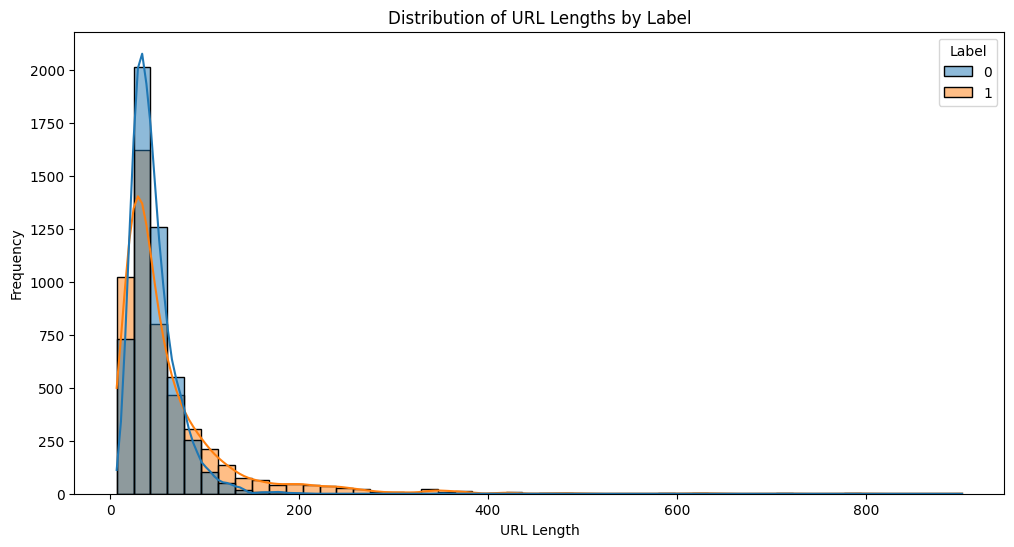

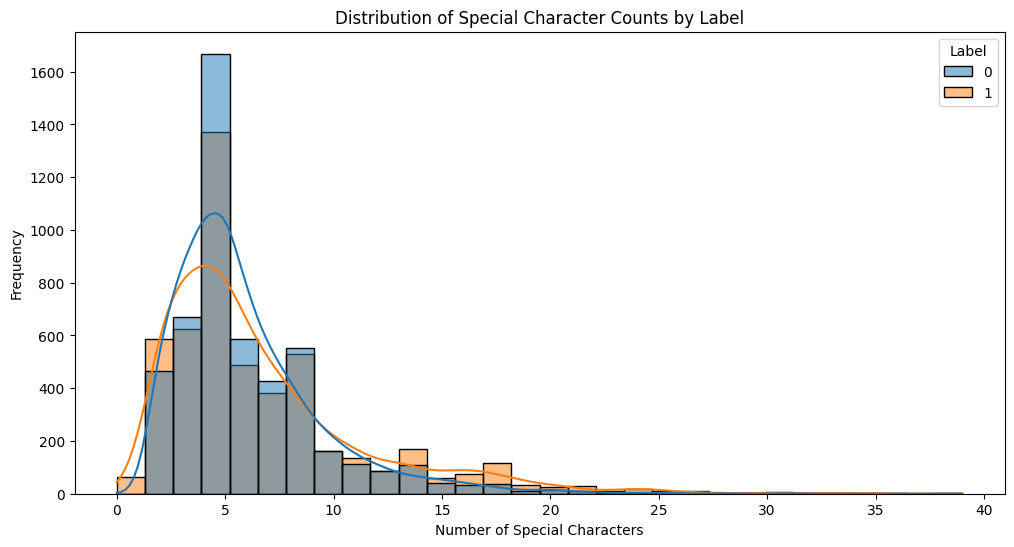

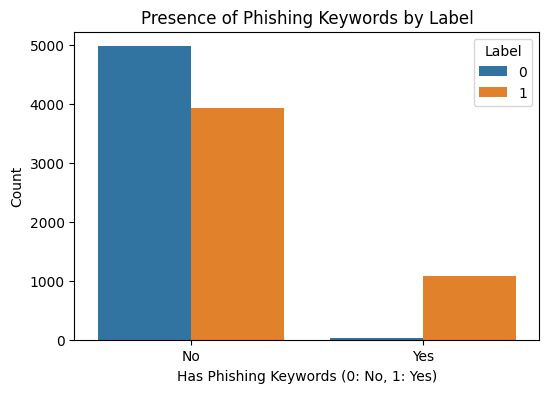

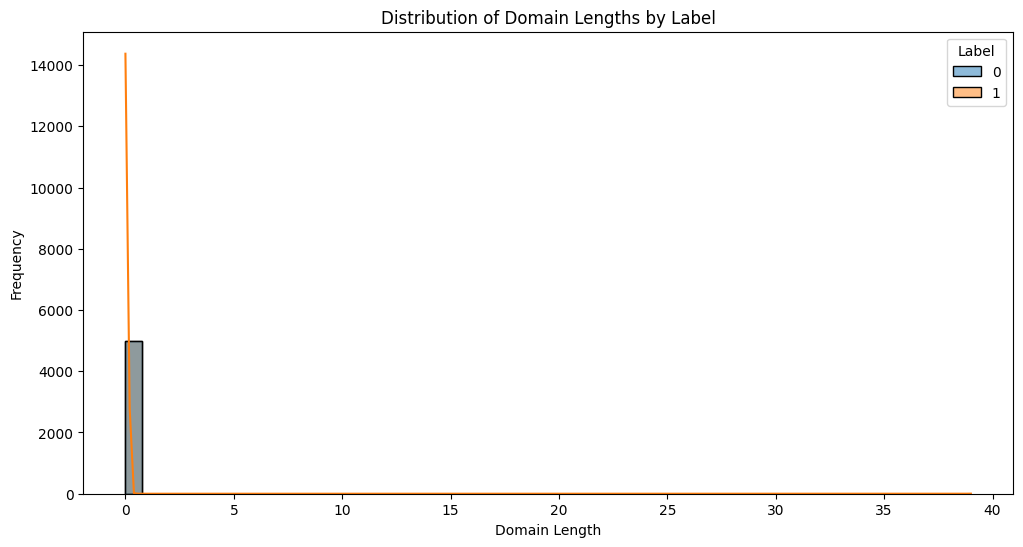

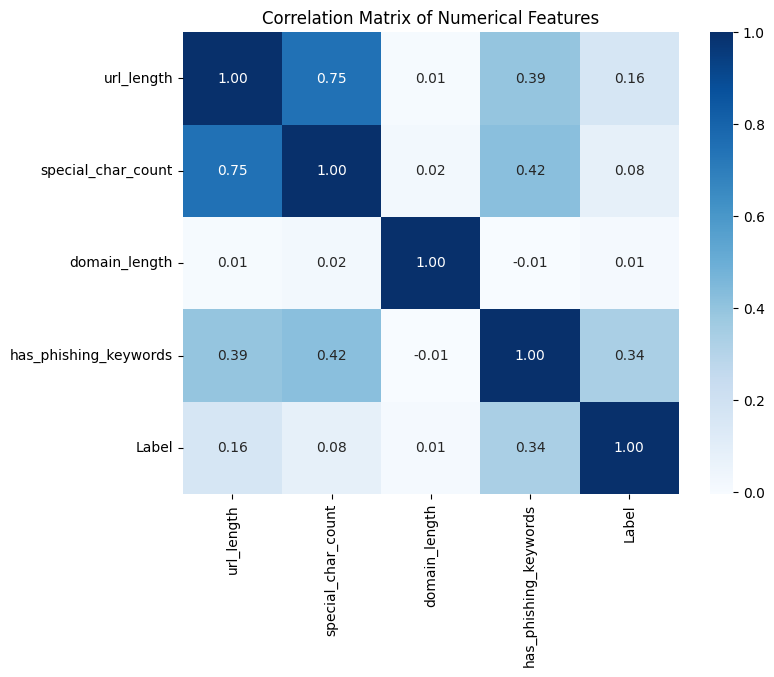

In [ ]:
# More Data Visualizations

# 1. URL Length distribution by Label
plt.figure(figsize=(12, 6))
sns.histplot(data=balanced_df, x='url_length', hue='Label', bins=50, kde=True, common_norm=False)
plt.title('Distribution of URL Lengths by Label')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()

# 2. Special Character Count distribution by Label
plt.figure(figsize=(12, 6))
sns.histplot(data=balanced_df, x='special_char_count', hue='Label', bins=30, kde=True, common_norm=False)
plt.title('Distribution of Special Character Counts by Label')
plt.xlabel('Number of Special Characters')
plt.ylabel('Frequency')
plt.show()

# 3. Phishing Keyword Presence by Label
plt.figure(figsize=(6, 4))
sns.countplot(x='has_phishing_keywords', hue='Label', data=balanced_df)
plt.title('Presence of Phishing Keywords by Label')
plt.xlabel('Has Phishing Keywords (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 4. Domain Length distribution by Label
plt.figure(figsize=(12, 6))
sns.histplot(data=balanced_df, x='domain_length', hue='Label', bins=50, kde=True, common_norm=False)
plt.title('Distribution of Domain Lengths by Label')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.show()

# 5. Correlation Heatmap of Numerical Features
numerical_features = ['url_length', 'special_char_count', 'domain_length', 'has_phishing_keywords', 'Label']
plt.figure(figsize=(8, 6))
sns.heatmap(balanced_df[numerical_features].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Phishing URL Detection using Machine Learning

This project implements various machine learning models to detect phishing URLs. Phishing is a type of online fraud where attackers attempt to obtain sensitive information by impersonating legitimate entities. This project aims to build a robust model to identify and flag such malicious URLs.

## Dataset

The dataset used in this project is sourced from `/content/drive/MyDrive/5th semester /OOP/M2_Group_7 Team Nexus : Fake URL Detection/Dataset /0. phishing_site_urls(550k_Data).xlsx`. It contains a large collection of URLs labeled as either 'good' (legitimate) or 'bad' (phishing). For this project, a balanced subset of 5000 good and 5000 bad URLs was sampled for training and evaluation.

## Methodology

The project follows a standard machine learning pipeline:

1.  **Data Loading and Exploration**: The dataset is loaded and basic statistics and label distribution are examined.
2.  **Data Preprocessing**: URLs are preprocessed, and labels are converted to a binary format (0 for good, 1 for bad).
3.  **Feature Engineering**: New features are created from the URLs, including:
    *   URL length
    *   Number of special characters
    *   Presence of common phishing keywords
    *   Domain length
4.  **Feature Extraction**: TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert the URL text data into numerical features. An n-gram range of (1, 2) is used to capture both individual words and common two-word phrases.
5.  **Model Training and Evaluation**: Several classification models are trained and evaluated on the dataset:
    *   Logistic Regression
    *   Decision Tree
    *   Random Forest
    *   Support Vector Machine (SVM)
    *   Naive Bayes
    *   Gradient Boosting
    *   AdaBoost
    *   XGBoost
6.  **Hyperparameter Tuning**: GridSearchCV with cross-validation is used to find the optimal hyperparameters for the best-performing models (SVM and Logistic Regression).
7.  **Model Comparison**: The performance of all models, including the tuned ones, is compared based on accuracy and other relevant metrics.
8.  **Interactive URL Checker**: An interactive tool is created using `ipywidgets` to allow users to input a URL and get a prediction from the best-performing model.

## Results

The models were evaluated based on their accuracy on the test set. The initial evaluation with TF-IDF features showed promising results across several models. The inclusion of n-grams in the TF-IDF vectorization generally improved the performance of the models. Hyperparameter tuning on the SVM and Logistic Regression models further optimized their performance on the cross-validation sets.

The final comparison of tuned models on the test set showed competitive accuracies, with SVM and Logistic Regression achieving high performance in detecting both legitimate and phishing URLs.

Detailed accuracy results and confusion matrices for each model can be found in the notebook.

## How to Run the Notebook

1.  **Clone the repository**: Clone this GitHub repository to your local machine.
2.  **Open in Google Colab**: Upload the `phishing_url_detection.ipynb` notebook to Google Colab.
3.  **Mount Google Drive**: Ensure your Google Drive is mounted in the Colab notebook to access the dataset. You might need to adjust the `file_path` in the notebook to match the location of the dataset on your Google Drive.
4.  **Run all cells**: Execute all the code cells in the notebook sequentially.
5.  **Use the URL Checker**: Once all cells have run successfully, the interactive URL checker widget will appear at the end of the notebook. Enter a URL in the text box and click "Check URL" to get a prediction.

## Dependencies

The project requires the following libraries:

*   pandas
*   numpy
*   scikit-learn
*   matplotlib
*   seaborn
*   ipywidgets
*   xgboost

These dependencies can be installed using pip as shown in the notebook.

## Future Work

*   Explore more advanced feature engineering techniques, such as using features extracted from the HTML content of the URLs (if accessible and permissible).
*   Investigate deep learning models for URL classification.
*   Integrate the model into a web application or browser extension for real-time phishing detection.
*   Continuously update the dataset with new URL examples to keep the model up-to-date with evolving phishing techniques.

## License

[Include your chosen license here, e.g., MIT License]